# Long only 1/n portfolio

In [1]:
import pandas as pd
pd.options.plotting.backend = "plotly"

import yfinance as yf

from cvx.simulator.portfolio import build_portfolio

In [2]:
data = yf.download(tickers = "SPY AAPL GOOG MSFT",  # list of tickers
                   period = "10y",                   # time period
                   interval = "1d",                 # trading interval
                   prepost = False,                 # download pre/post market hours data?
                   repair = True)                   # repair obvious price errors e.g. 100x?

[*********************100%***********************]  4 of 4 completed


In [3]:
prices = data["Adj Close"]

In [4]:
capital = 1e6

In [5]:
portfolio = build_portfolio(prices=prices)
#portfolio[portfolio.index[0]] = pd.Series(index=portfolio.assets, data=0.0)

In [14]:
for before, now, snapshot in portfolio:
    # each day we invest a quarter of the capital in the assets
    portfolio[now] = 0.25 * snapshot.nav / portfolio.prices.loc[now]
    print(snapshot.cash)

-6364587.535327333
105156.01894176193
-12323.159361380574
19147.152273841868
19558.546356171046
21132.7007842653
-7053.52612971262
10398.956502573128
-9797.005667632271
2420.6855260458033
4914.518915613484
8001.808640289366
5564.191129595892
963.1290389818978
14760.429752920543
11405.85301304165
-5935.360808746786
-12529.391365144009
-9150.189909744113
-520.2597151934569
11840.603934169947
-7127.424596854551
10702.865617723328
-8964.993843173841
9743.124671233913
-14365.401216930819
-11956.403942850517
2082.5963304463075
23872.619217568666
-119.84388836531434
-17819.79916057288
-10407.72332867158
8951.605822760192
-12829.0506949401
17529.280293711556
9417.555738977218
-18696.999479108894
-36948.42365534628
-6447.365185300274
-15380.583227319374
1692.5549274764853
10853.967518905074
2726.2229205323156
1733.6077164775238
16486.924999831495
1293.3023997429718
5136.723363310268
6727.400619196729
6714.61130245159
10422.894080584938
3092.4318255170056
30305.763857402104
426.1915426472042
919

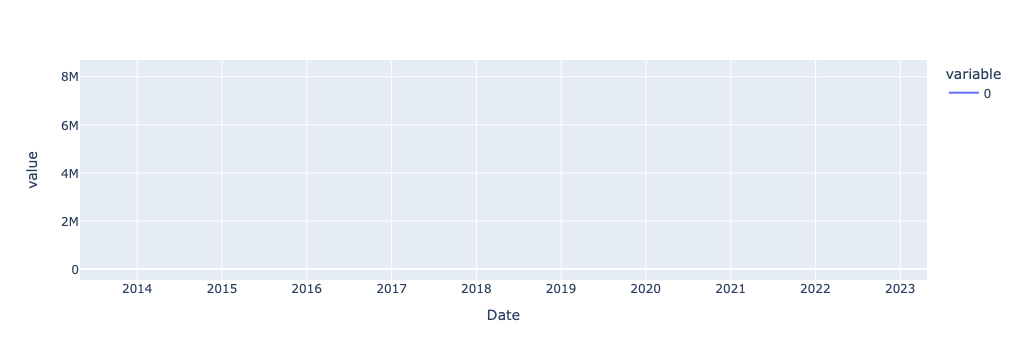

In [7]:
portfolio.profit.cumsum().plot()

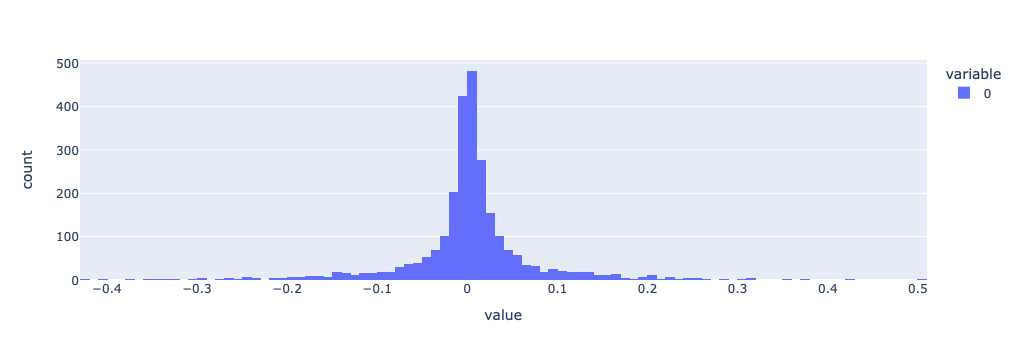

In [8]:
(portfolio.profit / capital).hist()

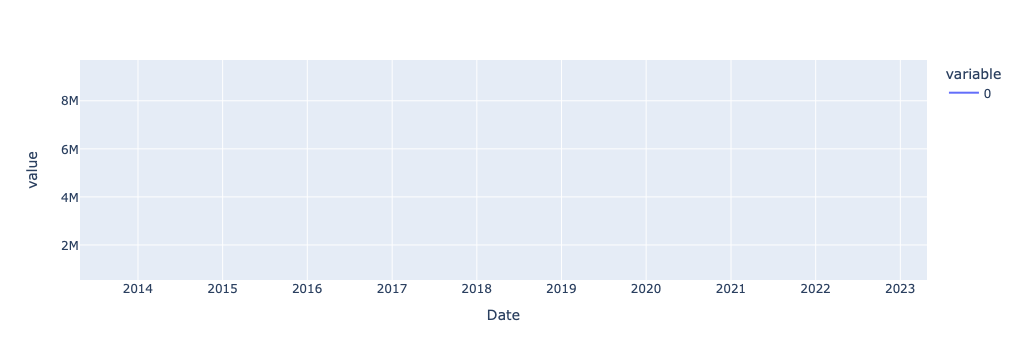

In [9]:
portfolio.nav.plot()

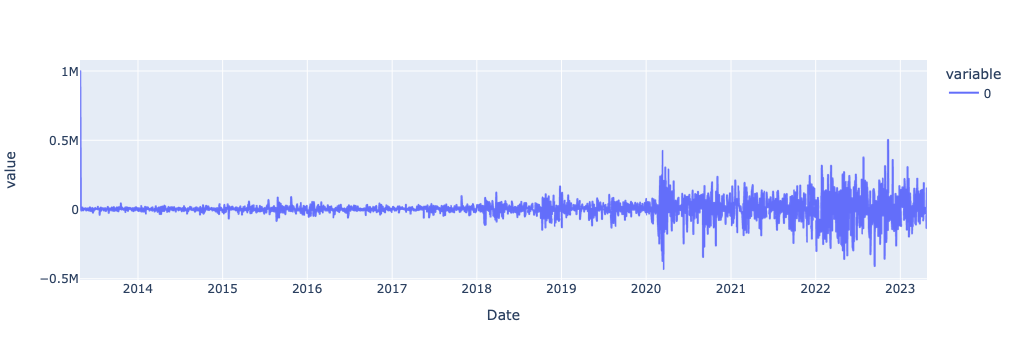

In [13]:
portfolio.cash.plot()

In [12]:
returns = portfolio.profit / portfolio.nav.shift(1)

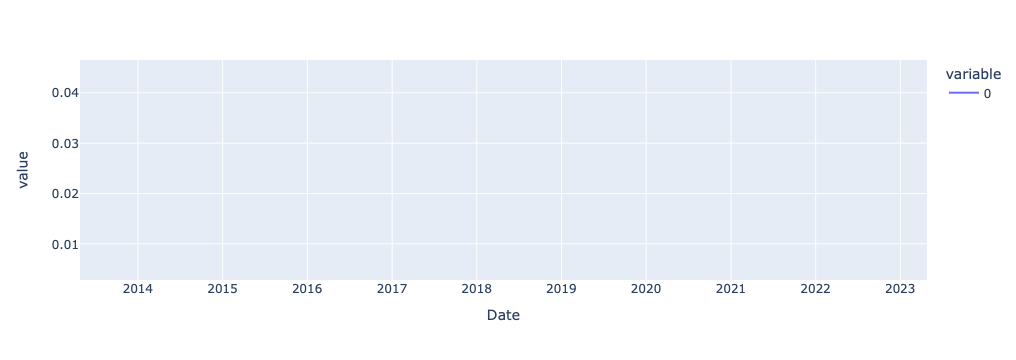

In [15]:
returns.ewm(com=30).std().plot()

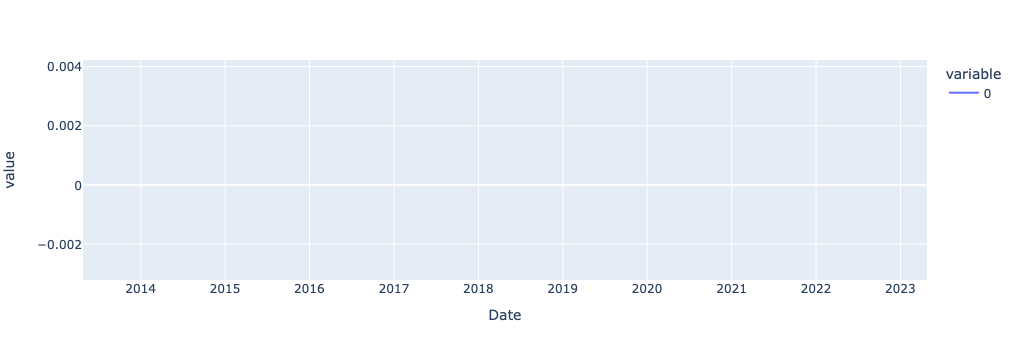

In [16]:
returns.ewm(com=60, min_periods=60).mean().plot()

In [17]:
portfolio.trades_stocks

AAPL          GOOG         MSFT          SPY
Date                                                            
2013-04-26      0.000000      0.000000     0.000000     0.000000
2013-04-29  18843.208268  12254.880420  9244.128583  1888.393892
2013-04-30   -293.610310     81.142433   -14.872273    20.737245
2013-05-01     -7.587129    -40.504685    29.808755     0.924538
2013-05-02    -39.405842     10.180871   -12.981076     5.183345
...                  ...           ...          ...          ...
2023-04-20     34.399642   -195.312080    34.744663    12.163869
2023-04-21     81.332422    -45.943741    -8.489005   -14.870831
2023-04-24    -28.882889   -154.321740    86.900093    -7.833058
2023-04-25    -85.728697     57.878924    36.820672    -5.309484
2023-04-26    210.890322    293.945364  -350.276314    94.966311

[2518 rows x 4 columns]

In [18]:
portfolio.trades_currency

AAPL           GOOG           MSFT            SPY
Date                                                                  
2013-04-26       0.000000       0.000000       0.000000       0.000000
2013-04-29  250000.000000  250000.000000  250000.000000  250000.000000
2013-04-30   -4010.095453    1666.444174    -408.252225    2751.903504
2013-05-01    -102.807368    -827.679151     808.872899     121.613620
2013-05-02    -541.530893     210.365323    -356.983680     688.149250
...                   ...            ...            ...            ...
2023-04-20    5732.700152  -20683.549603    9940.794937    5010.054514
2023-04-21   13421.476544   -4865.901741   -2425.818026   -6129.756777
2023-04-24   -4775.208102  -16478.475234   24485.838140   -3232.154804
2023-04-25  -14039.789135    6054.714241   10141.150102   -2156.075208
2023-04-26   34680.912827   30940.689677 -104261.495787   38639.893283

[2518 rows x 4 columns]

In [19]:
portfolio.cash

Date
2013-04-26    1.000000e+06
2013-04-29    0.000000e+00
2013-04-30    1.164153e-10
2013-05-01    0.000000e+00
2013-05-02    2.328306e-10
                  ...     
2023-04-20   -3.492460e-10
2023-04-21    4.656613e-10
2023-04-24    8.149073e-10
2023-04-25    1.164153e-10
2023-04-26    3.492460e-10
Length: 2518, dtype: float64

In [20]:
portfolio.equity.sum(axis=1).shift(1)

Date
2013-04-26             NaN
2013-04-29    0.000000e+00
2013-04-30    1.000000e+06
2013-05-01    1.013393e+06
2013-05-02    1.004994e+06
                  ...     
2023-04-20    7.427766e+06
2023-04-21    7.407272e+06
2023-04-24    7.388508e+06
2023-04-25    7.383287e+06
2023-04-26    7.257461e+06
Length: 2518, dtype: float64